In [3]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Create date range for the past 5 years
end_date = datetime.now()
start_date = end_date - timedelta(days=5*365)
dates = pd.date_range(start=start_date, end=end_date, freq='B')  # Business days

# Create sample Facebook/Meta data
np.random.seed(42)  # For reproducibility
fb = pd.DataFrame({
    'Open': np.random.normal(300, 30, len(dates)),
    'High': np.random.normal(305, 30, len(dates)),
    'Low': np.random.normal(295, 30, len(dates)),
    'Close': np.random.normal(300, 30, len(dates)),
    'Volume': np.random.randint(1000000, 5000000, len(dates))
}, index=dates)

# Add some trend to make it more realistic
trend = np.linspace(0, 100, len(dates))
fb['Close'] = fb['Close'] + trend
fb['Open'] = fb['Open'] + trend
fb['High'] = fb['High'] + trend
fb['Low'] = fb['Low'] + trend

# Create sample Microsoft data
np.random.seed(43)  # Different seed for different pattern
ms = pd.DataFrame({
    'Open': np.random.normal(250, 25, len(dates)),
    'High': np.random.normal(255, 25, len(dates)),
    'Low': np.random.normal(245, 25, len(dates)),
    'Close': np.random.normal(250, 25, len(dates)),
    'Volume': np.random.randint(2000000, 6000000, len(dates))
}, index=dates)

# Add some trend to make it more realistic
ms['Close'] = ms['Close'] + trend * 1.2  # Different trend than FB
ms['Open'] = ms['Open'] + trend * 1.2
ms['High'] = ms['High'] + trend * 1.2
ms['Low'] = ms['Low'] + trend * 1.2

# Ensure High is the highest and Low is the lowest for each day
for df in [fb, ms]:
    for idx in df.index:
        max_val = max(df.loc[idx, 'Open'], df.loc[idx, 'Close'])
        min_val = min(df.loc[idx, 'Open'], df.loc[idx, 'Close'])
        df.loc[idx, 'High'] = max(df.loc[idx, 'High'], max_val + abs(np.random.normal(0, 2)))
        df.loc[idx, 'Low'] = min(df.loc[idx, 'Low'], min_val - abs(np.random.normal(0, 2)))

# Add Adjusted Close column
# For simplicity, we'll simulate occasional small dividend adjustments
fb['Adj Close'] = fb['Close'].copy()
ms['Adj Close'] = ms['Close'].copy()

# Simulate dividend adjustments (small percentage changes at random intervals)
for df in [fb, ms]:
    # Create random dividend dates (about 4 per year)
    dividend_dates = sorted(np.random.choice(df.index[100:], size=20, replace=False))
    
    # Apply dividend adjustments (small percentage reductions)
    adjustment_factor = 1.0
    for date in dividend_dates:
        # Reduce by 0.5% to 1.5% to simulate dividend adjustment
        dividend_pct = np.random.uniform(0.005, 0.015)
        adjustment_factor *= (1 - dividend_pct)
        
        # Apply adjustment to all prices before this date
        idx = df.index.get_loc(date)
        df.loc[df.index[:idx], 'Adj Close'] *= adjustment_factor

print("Facebook (Meta) stock data:")
print(fb.head())
print("\nMicrosoft stock data:")
print(ms.head())


Facebook (Meta) stock data:
                                  Open        High         Low       Close  \
2020-06-08 08:12:13.167962  314.901425  317.803631  293.611754  297.244657   
2020-06-09 08:12:13.167962  295.928758  305.922122  260.946117  297.453627   
2020-06-10 08:12:13.167962  319.584030  320.266018  289.108628  316.602963   
2020-06-11 08:12:13.167962  345.920957  348.336083  295.034422  328.717898   
2020-06-12 08:12:13.167962  293.282147  319.547695  292.193054  298.524293   

                             Volume  Adj Close  
2020-06-08 08:12:13.167962  4103577  41.354332  
2020-06-09 08:12:13.167962  3928583  41.383405  
2020-06-10 08:12:13.167962  4688498  44.047567  
2020-06-11 08:12:13.167962  1163543  45.733065  
2020-06-12 08:12:13.167962  4979439  41.532362  

Microsoft stock data:
                                  Open        High         Low       Close  \
2020-06-08 08:12:13.167962  256.434998  260.624707  218.854219  219.741476   
2020-06-09 08:12:13.167962  22

In [7]:
import os
print("Files are saved at:", os.getcwd())
   

Files are saved at: C:\Users\moses


In [9]:
print("Last 5 rows of FB data:")
print(fb.tail())

Last 5 rows of FB data:
                                  Open        High         Low       Close  \
2025-06-02 08:12:13.167962  379.650538  416.909838  352.235236  414.821887   
2025-06-03 08:12:13.167962  429.531209  429.757299  401.325960  408.498881   
2025-06-04 08:12:13.167962  394.597833  396.127713  384.032083  384.636366   
2025-06-05 08:12:13.167962  377.250958  431.835299  369.575070  384.506294   
2025-06-06 08:12:13.167962  416.095295  443.246251  350.029521  364.031458   

                             Volume   Adj Close  
2025-06-02 08:12:13.167962  1700731  414.821887  
2025-06-03 08:12:13.167962  2802218  408.498881  
2025-06-04 08:12:13.167962  4606940  384.636366  
2025-06-05 08:12:13.167962  2741233  384.506294  
2025-06-06 08:12:13.167962  4068929  364.031458  


In [37]:
#Slicing the dataframe to make use of only 1 year's data
start_date = '2024-01-06'
end_date = '2025-06-06'
fb1 = df.loc[start_date:end_date]
fb1

,Open,High,Low,Close,Volume,Adj Close
2024-01-08 08:12:13.167962,377.097392,377.301437,303.539769,304.682630,3127483,72.048559
2024-01-09 08:12:13.167962,350.605670,362.965685,347.206779,360.429431,5602397,85.231052
2024-01-10 08:12:13.167962,336.181938,350.875597,335.534010,341.077304,3668631,80.654838
2024-01-11 08:12:13.167962,330.349288,350.234552,276.812848,348.159828,5491676,82.329648
2024-01-12 08:12:13.167962,366.976845,384.748461,293.249600,330.292682,3374690,78.104589
...,...,...,...,...,...,...
2025-06-02 08:12:13.167962,359.223261,450.336078,341.726040,341.787384,3221524,341.787384
2025-06-03 08:12:13.167962,370.221535,402.270044,367.592326,400.234050,2160152,400.234050
2025-06-04 08:12:13.167962,364.554438,384.708932,355.414789,382.848244,4711145,382.848244
2025-06-05 08:12:13.167962,371.051518,407.092135,311.640368,314.207229,4965604,314.207229


In [41]:
#Add two columns - MA10 and MA50
#use dropna to remove any "Not a Number" data
fb1['MA10'] = fb1['Close'].rolling(10).mean()
fb1['MA50'] = fb1['Close'].rolling(50).mean()
fb1 = fb1.dropna()
fb1.head()

C:\Users\moses\AppData\Local\Temp\ipykernel_15696\3372867353.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fb1['MA10'] = fb1['Close'].rolling(10).mean()
C:\Users\moses\AppData\Local\Temp\ipykernel_15696\3372867353.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fb1['MA50'] = fb1['Close'].rolling(50).mean()


,Open,High,Low,Close,Volume,Adj Close,MA10,MA50
2024-05-23 08:12:13.167962,343.545730,345.897958,309.304393,335.895179,2886127,160.859038,349.482706,343.810417
2024-05-24 08:12:13.167962,301.249615,422.101190,297.605110,422.014470,2963035,202.101268,356.817190,345.700621
2024-05-27 08:12:13.167962,356.222051,396.265909,330.013087,395.288671,4149479,189.302376,357.352076,347.435211
2024-05-28 08:12:13.167962,353.227206,353.991250,336.922220,337.101993,3891347,161.436977,356.474507,347.611836
2024-05-29 08:12:13.167962,340.178174,350.241963,299.729132,348.560090,3389870,166.924220,356.561286,347.957935


In [43]:
#Add a new column "Shares", if MA10>MA50, denote as 1 (long one share of stock), otherwise, denote as 0 (do nothing)

fb1['Shares'] = [1 if fb1.loc[ei, 'MA10']>fb1.loc[ei, 'MA50'] else 0 for ei in fb1.index]

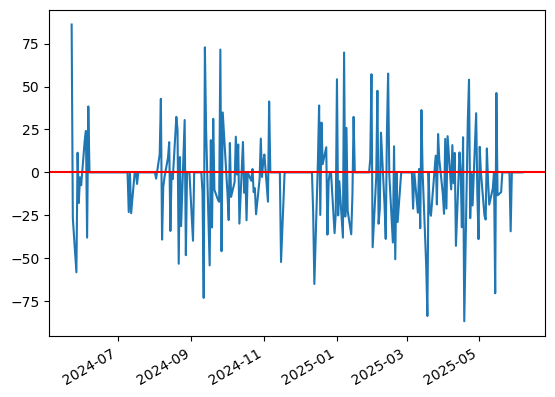

In [47]:
#Add a new column "Profit" using List Comprehension, for any rows in fb, if Shares=1, the profit is calculated as the close price of 
#tomorrow - the close price of today. Otherwise the profit is 0.

#Plot a graph to show the Profit/Loss
#But first import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
fb1['Close1'] = fb1['Close'].shift(-1)
fb1['Profit'] = [fb1.loc[ei, 'Close1'] - fb1.loc[ei, 'Close'] if fb1.loc[ei, 'Shares']==1 else 0 for ei in fb1.index]
fb1['Profit'].plot()
plt.axhline(y=0, color='red')

In [55]:
# Use .cumsum() to display our model's performance if we follow the strategy
#Use .cumsum() to calculate the accumulated wealth over the period

fb1['wealth'] = fb1['Profit'].cumsum()
fb1.tail()

,Open,High,Low,Close,Volume,Adj Close,MA10,MA50,Shares,Close1,Profit,wealth
2025-06-02 08:12:13.167962,359.223261,450.336078,341.726040,341.787384,3221524,341.787384,359.804654,370.053189,0,400.234050,0.0,-832.78794
2025-06-03 08:12:13.167962,370.221535,402.270044,367.592326,400.234050,2160152,400.234050,363.141947,370.694207,0,382.848244,0.0,-832.78794
2025-06-04 08:12:13.167962,364.554438,384.708932,355.414789,382.848244,4711145,382.848244,365.550732,370.792773,0,314.207229,0.0,-832.78794
2025-06-05 08:12:13.167962,371.051518,407.092135,311.640368,314.207229,4965604,314.207229,361.184544,369.891202,0,428.643887,0.0,-832.78794
2025-06-06 08:12:13.167962,379.163395,429.165174,348.015513,428.643887,5117354,428.643887,367.951734,370.831521,0,NaN,0.0,-832.78794


Text(0.5, 1.0, 'Total money you win is -832.7879403176385')

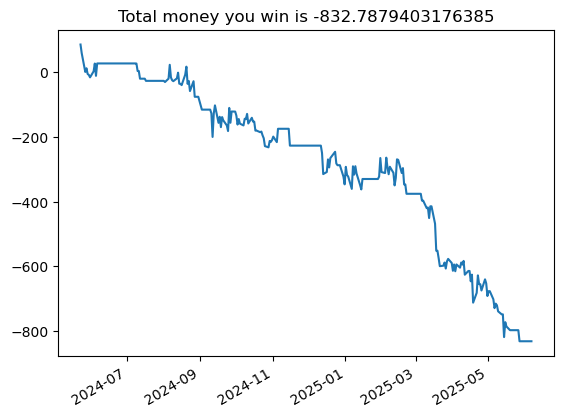

In [57]:
#plot the wealth to show the growth of profit over the period

fb1['wealth'].plot()
plt.title('Total money you win is {}'.format(fb1.loc[fb1.index[-2], 'wealth']))

In [ ]:
# Conclusively we can see that the moving average strategy leads to losses from the one year six months data of facebook stock.